## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
results = mouse_metadata.merge(study_results, on="Mouse ID")
# Display the data table for preview
print(results.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of mice.
print(results['Mouse ID'].nunique())
mouse_metadata.count()

249


Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(results.count())
dup_mouse= results.duplicated(['Mouse ID','Timepoint'], keep=False)
tf_results = results.copy()
tf_results['Duplicate'] = dup_mouse
print(tf_results['Duplicate'].value_counts())
tf_results.loc[tf_results['Duplicate'] == True]

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64
False    1883
True       10
Name: Duplicate, dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_results = results.drop_duplicates(subset=['Timepoint','Mouse ID'], keep=False)
drop_num=[]
for x in range(908, 921):
    drop_num.append(x)
clean_results = results.drop(drop_num)

In [5]:
# Checking the number of mice in the clean DataFrame.
clean_results.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_drug_results = clean_results.groupby('Drug Regimen').mean()
mean_drug_results = mean_drug_results['Tumor Volume (mm3)']

median_drug_results = clean_results.groupby('Drug Regimen').median()
median_drug_results=median_drug_results['Tumor Volume (mm3)']

variance_drug_results = clean_results.groupby('Drug Regimen').var()
variance_drug_results = variance_drug_results['Tumor Volume (mm3)']

std_drug_results = clean_results.groupby('Drug Regimen').std()
std_drug_results = std_drug_results['Tumor Volume (mm3)']

sem_drug_results = clean_results.groupby('Drug Regimen').sem()
sem_drug_results = sem_drug_results['Tumor Volume (mm3)']

sum_volume_regimen = pd.DataFrame(
    {'Mean Tumor Volume (mm3)': mean_drug_results,
     'Median Tumor Volume (mm3)': median_drug_results,
     'Variance Tumor Volume (mm3)':variance_drug_results,
     'Standard Deviation Tumor Volume (mm3)':std_drug_results,
     'SEM  Tumor Volume (mm3)':sem_drug_results})
sum_volume_regimen


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

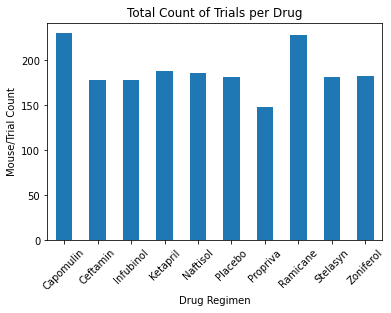

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_mice_count = pd.DataFrame(clean_results.groupby('Drug Regimen').count())
bar_graph = drug_mice_count.plot.bar( y='Mouse ID', rot = 45, legend= False)
bar_graph.set_ylabel("Mouse/Trial Count")
bar_graph.set_title("Total Count of Trials per Drug")
plt.show()

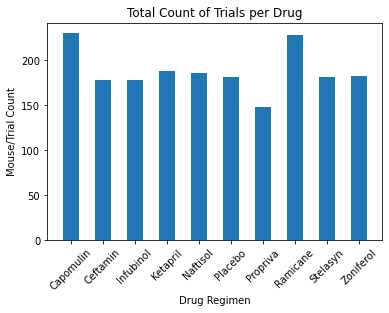

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pylpot.
#print(drug_mice_count.head())
plt.bar(drug_mice_count.index,drug_mice_count["Mouse ID"], width=.5)
plt.xticks(rotation=45)
plt.title("Total Count of Trials per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse/Trial Count")
plt.show()

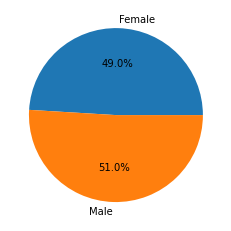

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#sex_count =pd.DataFrame(clean_results.drop_duplicates(subset=['Sex', 'Mouse ID']))
sex_count = pd.DataFrame(clean_results.groupby('Sex').count())
pie_graph = sex_count.plot.pie(y="Mouse ID",legend=False,autopct='%1.1f%%')
pie_graph.set_ylabel("")      
plt.show()

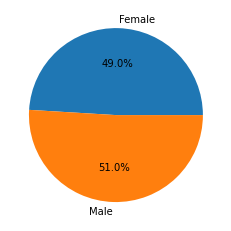

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count['Mouse ID'],autopct='%1.1f%%', labels=['Female',"Male"])
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#print(clean_results["Mouse ID"].nunique())
#print(clean_results.loc[clean_results['Mouse ID']=='z314'])
# Start by getting the last (greatest) timepoint for each mouse
last_treatment = clean_results.drop_duplicates(subset=['Mouse ID'], keep='last')
last_treatment


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [12]:
last_treatment.set_index("Drug Regimen", inplace=True)

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
box_data = last_treatment.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]

capomulin = box_data.loc[['Capomulin']]
capomulin_vol = capomulin["Tumor Volume (mm3)"]

ramicane = box_data.loc[["Ramicane"]]
ramicane_vol = ramicane['Tumor Volume (mm3)']

infubinol = box_data.loc[['Infubinol']]
infubinol_vol=infubinol['Tumor Volume (mm3)']

ceftamin = box_data.loc[['Ceftamin']]
ceftamin_vol=ceftamin['Tumor Volume (mm3)']

#box_data = box_data.groupby("Drug Regimen")
#print(capomulin_vol)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles_cap = capomulin_vol.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_capomulin = upperq_cap-lowerq_cap
print(iqr_capomulin)

quartiles_ram = ramicane_vol.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ramicane = upperq_ram-lowerq_ram
print(iqr_ramicane)

quartiles_inf = infubinol_vol.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_infubinol = upperq_inf-lowerq_inf
print(iqr_infubinol)

quartiles_ceft = ceftamin_vol.quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceftamin = upperq_ceft-lowerq_ceft
print(iqr_ceftamin)




    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

7.781863460000004
9.098536719999998
11.477135160000003
15.577752179999997


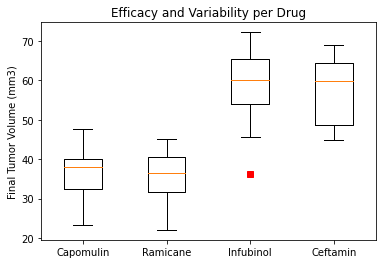

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Efficacy and Variability per Drug')
ax1.boxplot([capomulin_vol, ramicane_vol, infubinol_vol, ceftamin_vol], sym='rs', labels = treatment_labels)
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

    

## Line and Scatter Plots

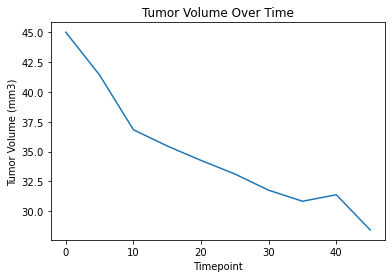

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin (Timepoint, Tumor Volume (mm3))
mouse = 'm601'
mouse_data = clean_results.loc[clean_results['Mouse ID']==mouse]
x_axis = list(mouse_data['Timepoint'])
y_axis = list(mouse_data['Tumor Volume (mm3)'])

plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time")


plt.show()



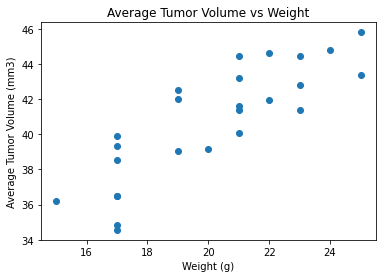

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_only = clean_results.loc[clean_results['Drug Regimen']=='Capomulin']
group_vol = capomulin_only.groupby(['Mouse ID']).mean()
#average_vol = group_vol['Tumor Volume (mm3)']
#print(group_vol.head())
x_axis = list(group_vol['Tumor Volume (mm3)'])
y_axis = list(group_vol['Weight (g)'])

plt.scatter(y_axis,x_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight")


plt.show()

## Correlation and Regression

Correlation coefficient=0.842
0.9544396890241045


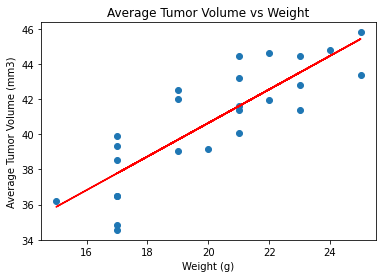

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
y_axis = list(group_vol['Tumor Volume (mm3)'])
x_axis = list(group_vol['Weight (g)'])
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
correlation = round((m_r),3)
print(f"Correlation coefficient={correlation}")

print(m_slope)
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight")
slope_line = m_slope*group_vol['Weight (g)']+m_int
plt.plot(group_vol['Weight (g)'], slope_line, color = "r")


plt.show()